<a href="https://colab.research.google.com/github/hebajamil/DS230-Final-Project/blob/main/Yet_another_copy_of_Copy_of_Copy_of_Copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
from pathlib import Path


In [7]:
DATA_DIR = Path("/content/drive/MyDrive/Colab Notebooks/data")



In [8]:
import os
os.listdir("/content/drive/MyDrive/Colab Notebooks/data")


['aisles.csv',
 'departments.csv',
 'order_products__train.csv',
 'order_products__prior.csv',
 'products.csv',
 'orders.csv']

In [9]:
!ls {DATA_DIR}

ls: cannot access '/content/drive/MyDrive/Colab': No such file or directory
ls: cannot access 'Notebooks/data': No such file or directory


In [10]:
dtypes_orders = {
    "order_id": np.int32,
    "user_id": np.int32,
    "order_number": np.int16,
    "order_dow": np.int8,
    "order_hour_of_day": np.int8,
    "days_since_prior_order": np.float32,  # has NaNs
    "eval_set": "category"
}

dtypes_op = {
    "order_id": np.int32,
    "product_id": np.int32,
    "add_to_cart_order": np.int16,
    "reordered": np.int8
}

dtypes_products = {
    "product_id": np.int32,
    "product_name": "category",
    "aisle_id": np.int16,
    "department_id": np.int16
}

dtypes_aisles = {
    "aisle_id": np.int16,
    "aisle": "category"
}

dtypes_departments = {
    "department_id": np.int16,
    "department": "category"
}


In [11]:
orders = pd.read_csv(DATA_DIR / "orders.csv", dtype=dtypes_orders)
op_prior = pd.read_csv(DATA_DIR / "order_products__prior.csv", dtype=dtypes_op)
op_train = pd.read_csv(DATA_DIR / "order_products__train.csv", dtype=dtypes_op)
products = pd.read_csv(DATA_DIR / "products.csv", dtype=dtypes_products)
aisles = pd.read_csv(DATA_DIR / "aisles.csv", dtype=dtypes_aisles)
departments = pd.read_csv(DATA_DIR / "departments.csv", dtype=dtypes_departments)

In [12]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
op_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [14]:
op_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [15]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [16]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [17]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
size_of_each_df = f"""
Size of orders: {orders.shape}\n
Size of op_prior: {op_prior.shape}\n
Size of op_train: {op_train.shape}\n
Size of products: {products.shape}\n
Size of aisles: {aisles.shape}\n
Size of departments: {departments.shape}\n
"""
print(size_of_each_df)


Size of orders: (3421083, 7)

Size of op_prior: (32434489, 4)

Size of op_train: (1384617, 4)

Size of products: (49688, 4)

Size of aisles: (134, 2)

Size of departments: (21, 2)




In [19]:
products_aisles = products.merge(
    aisles,
    on="aisle_id",
    how="left"
)

products_full = products_aisles.merge(
    departments,
    on="department_id",
    how="left"
)

print(products_full.shape)

(49688, 6)


In [20]:
op_prior_full = op_prior.merge(
    products_full,
    on="product_id",
    how="left"
)

print(op_prior_full.shape)

(32434489, 9)


In [21]:
op_prior_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 9 columns):
 #   Column             Dtype   
---  ------             -----   
 0   order_id           int32   
 1   product_id         int32   
 2   add_to_cart_order  int16   
 3   reordered          int8    
 4   product_name       category
 5   aisle_id           int16   
 6   department_id      int16   
 7   aisle              category
 8   department         category
dtypes: category(3), int16(3), int32(2), int8(1)
memory usage: 681.9 MB


In [22]:
op_train_full = op_train.merge(
    products_full,
    on="product_id",
    how="left"
)

print(op_train_full.shape)

(1384617, 9)


In [23]:
orders_prior = orders[orders["eval_set"] == "prior"]
orders_train = orders[orders["eval_set"] == "train"]
orders_test  = orders[orders["eval_set"] == "test"]

In [24]:
op_prior_full = op_prior_full.merge(
    orders_prior[["order_id", "user_id", "order_number",
                  "order_dow", "order_hour_of_day", "days_since_prior_order"]],
    on="order_id",
    how="left"
)

print(op_prior_full.shape)

(32434489, 14)


In [25]:
op_train_full = op_train_full.merge(
    orders_train[["order_id", "user_id", "order_number",
                  "order_dow", "order_hour_of_day", "days_since_prior_order"]],
    on="order_id",
    how="left"
)

print(op_train_full.shape)

(1384617, 14)


In [26]:
op_all = pd.concat([op_prior, op_train], ignore_index=True)

df = op_all.merge(products_full, on="product_id", how="left") \
                    .merge(orders[["order_id", "user_id", "eval_set",
                                   "order_number", "order_dow", "order_hour_of_day",
                                   "days_since_prior_order"]],
                           on="order_id", how="left")

print(df.shape)

(33819106, 15)


In [27]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   product_id              int32   
 2   add_to_cart_order       int16   
 3   reordered               int8    
 4   product_name            category
 5   aisle_id                int16   
 6   department_id           int16   
 7   aisle                   category
 8   department              category
 9   user_id                 int32   
 10  eval_set                category
 11  order_number            int16   
 12  order_dow               int8    
 13  order_hour_of_day       int8    
 14  days_since_prior_order  float32 
dtypes: category(4), float32(1), int16(4), int32(3), int8(3)
memory usage: 1.1 GB


In [29]:
df.isna().sum()

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
product_name,0
aisle_id,0
department_id,0
aisle,0
department,0
user_id,0


In [30]:
df.isna().sum().sum()

np.int64(2078068)

In [31]:
# nan ratio
df.isna().sum().sum() / df.size

np.float64(0.0040964378735105144)

In [32]:
# NaN ratio in col days_since_prior_order
df["days_since_prior_order"].isna().sum() / df.shape[0]

np.float64(0.06144656810265771)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
missing = (
    df.isna()
      .mean()
      .sort_values(ascending=False)
      .to_frame("pct_missing")
)

print(missing)

                        pct_missing
days_since_prior_order     0.061447
product_id                 0.000000
order_id                   0.000000
reordered                  0.000000
product_name               0.000000
aisle_id                   0.000000
add_to_cart_order          0.000000
department_id              0.000000
aisle                      0.000000
user_id                    0.000000
department                 0.000000
eval_set                   0.000000
order_number               0.000000
order_dow                  0.000000
order_hour_of_day          0.000000


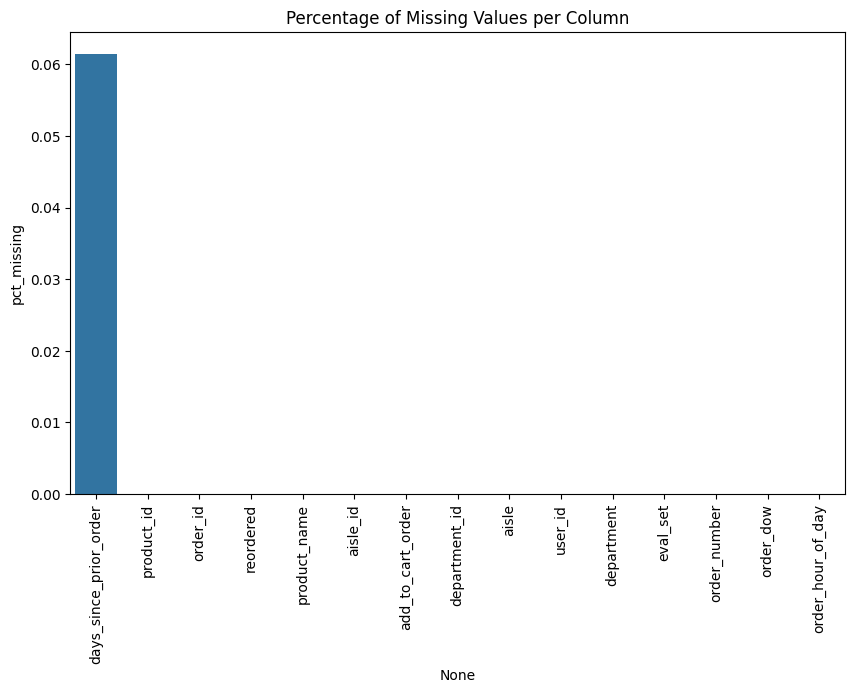

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x=missing.index, y=missing.pct_missing)
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values per Column")
plt.show()

In [36]:
SAMPLE_SIZE = 300_000

df_sample = df.sample(
    n=SAMPLE_SIZE,
    random_state=42
).reset_index(drop=True)

df_sample.shape

(300000, 15)

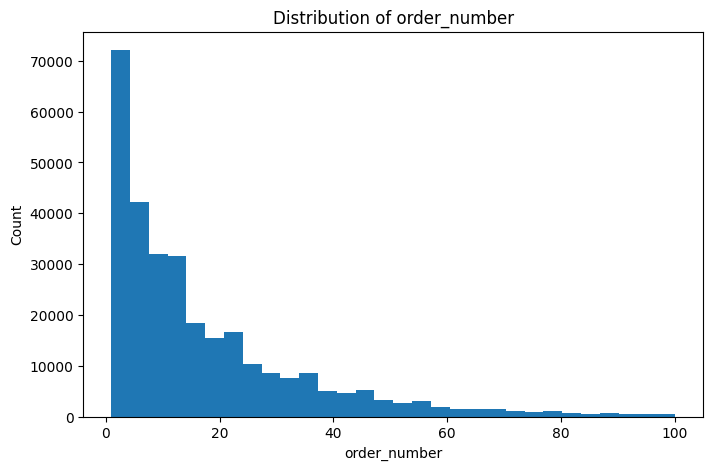

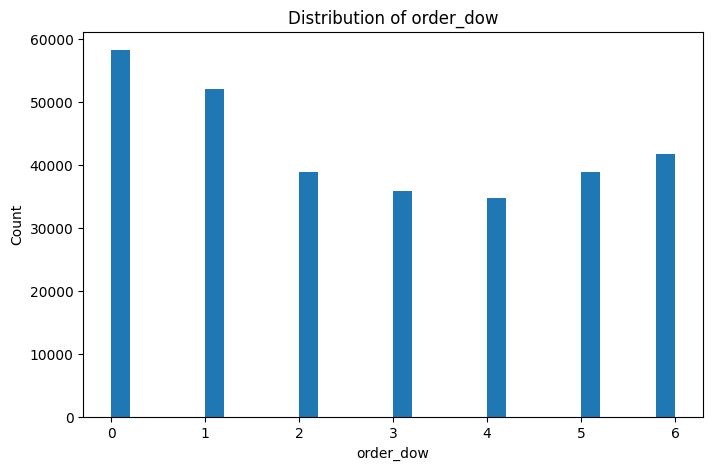

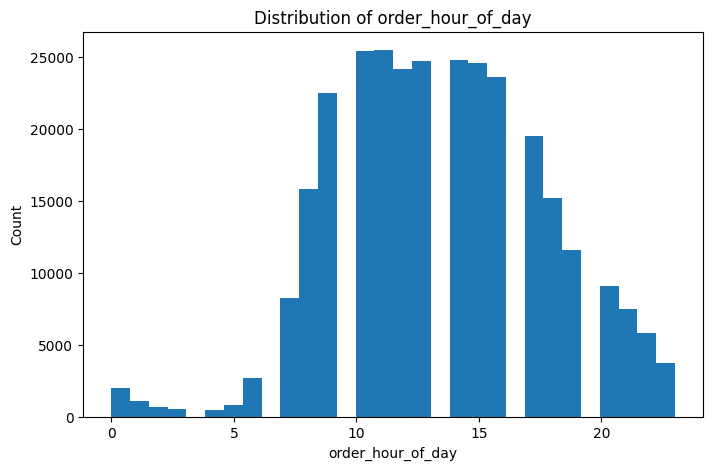

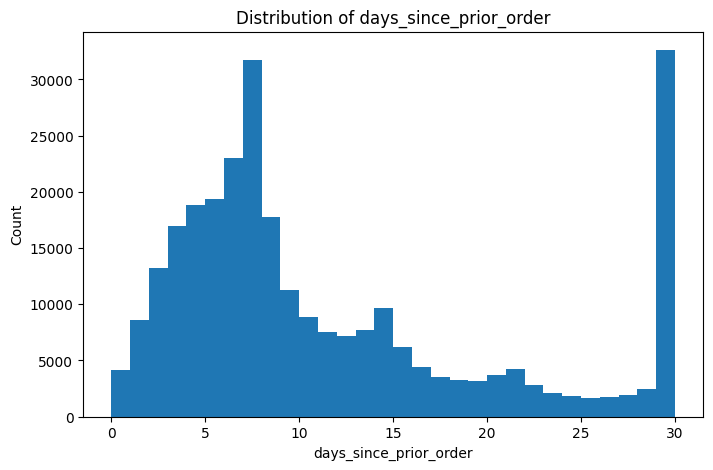

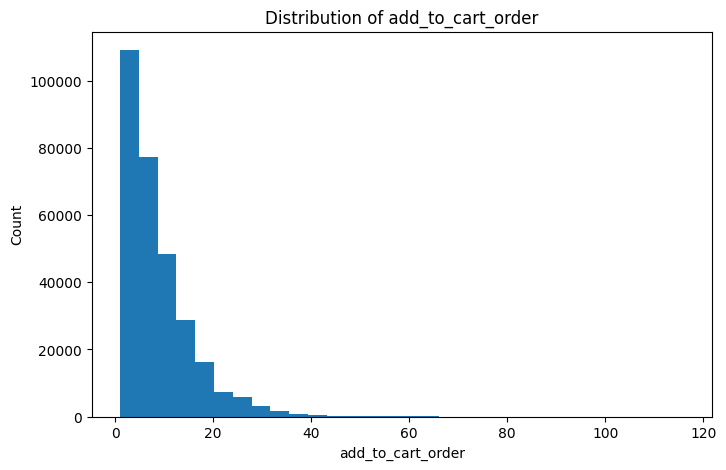

In [37]:
num_cols = [
    "order_number",
    "order_dow",
    "order_hour_of_day",
    "days_since_prior_order",
    "add_to_cart_order"
]

for col in num_cols:
    plt.figure(figsize=(8,5))
    plt.hist(df_sample[col].dropna(), bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

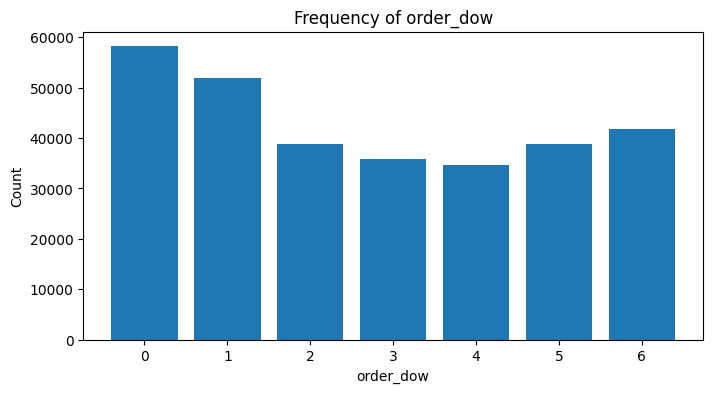

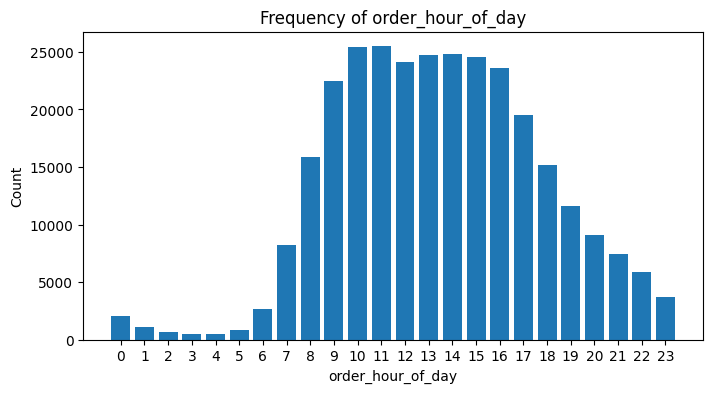

In [38]:
small_int_cols = ["order_dow", "order_hour_of_day"]

for col in small_int_cols:
    counts = df_sample[col].value_counts().sort_index()

    plt.figure(figsize=(8,4))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

<Axes: xlabel='reordered', ylabel='count'>

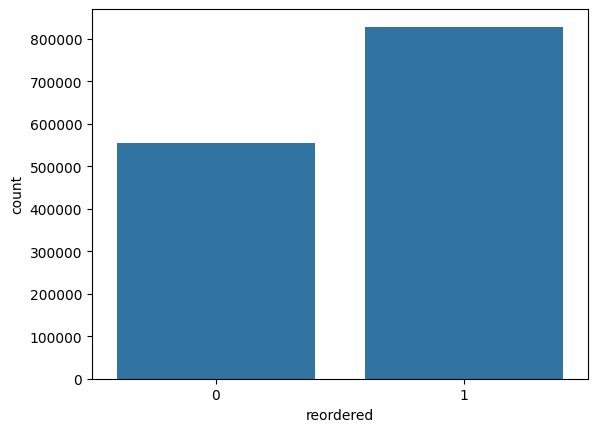

In [39]:
target = "reordered"
sns.countplot(x="reordered", data=df[df.eval_set == "train"])

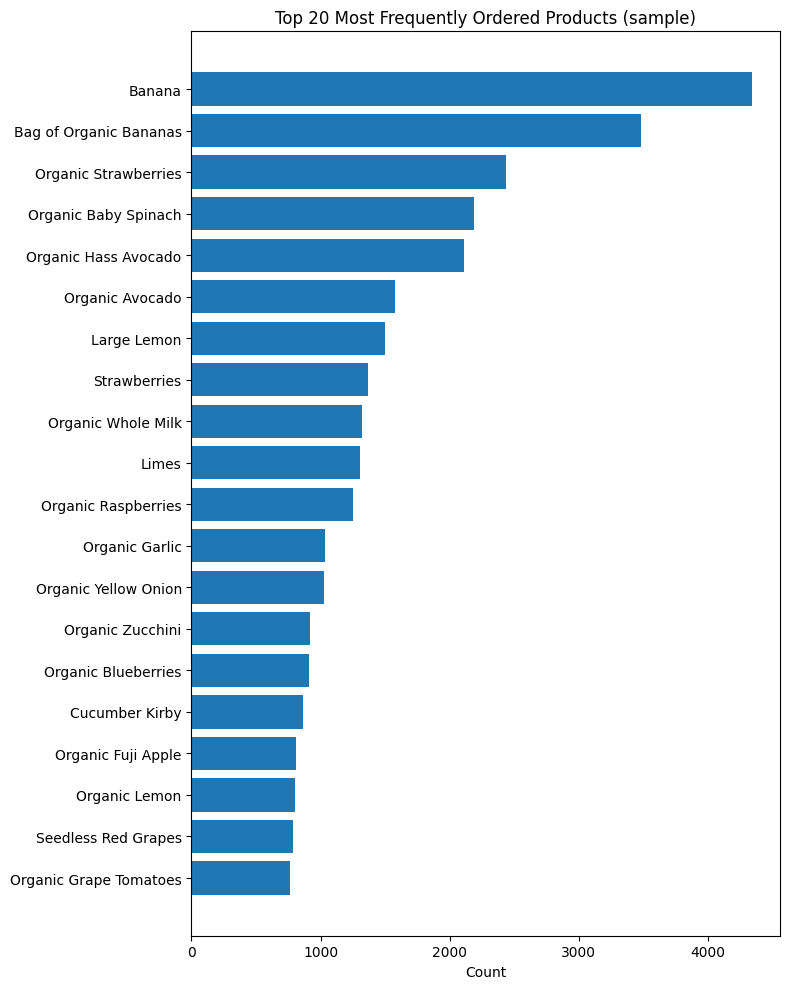

In [40]:
top_products = df_sample["product_name"].value_counts().head(20)

plt.figure(figsize=(8, 10))
y_pos = np.arange(len(top_products))

plt.barh(y_pos, top_products.values)
plt.yticks(y_pos, top_products.index)
plt.gca().invert_yaxis()  # biggest on top
plt.title("Top 20 Most Frequently Ordered Products (sample)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

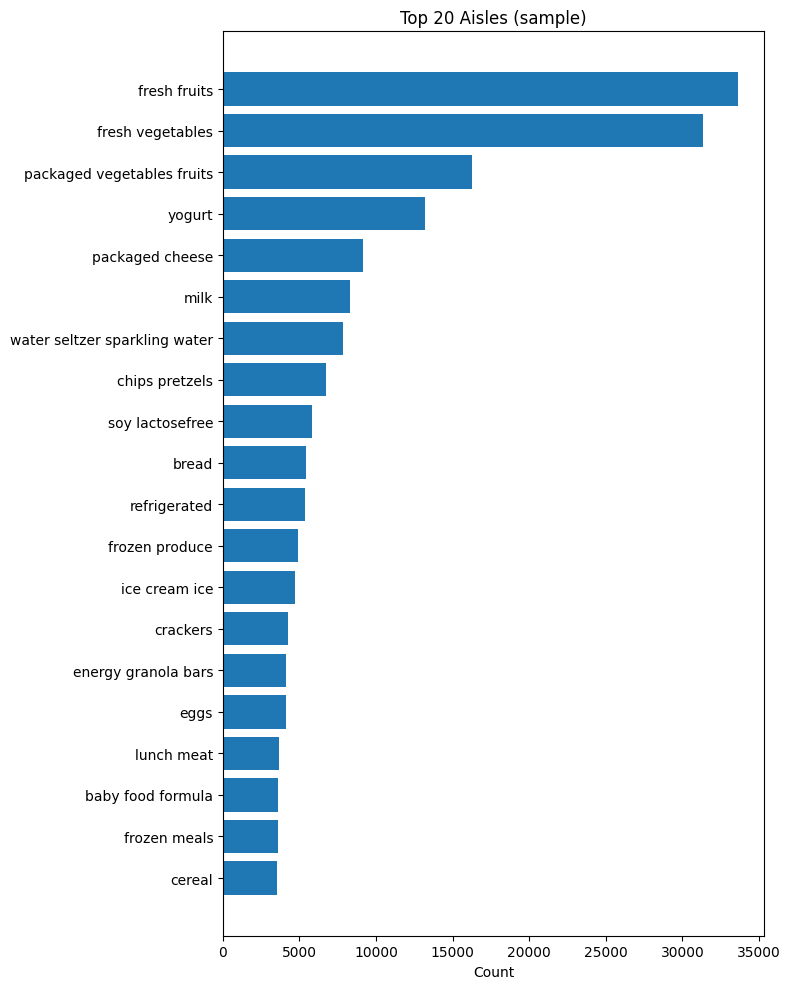

In [68]:
top_aisles = df_sample["aisle"].value_counts().head(20)

plt.figure(figsize=(8, 10))
y_pos = np.arange(len(top_aisles))

plt.barh(y_pos, top_aisles.values)
plt.yticks(y_pos, top_aisles.index)
plt.gca().invert_yaxis()
plt.title("Top 20 Aisles (sample)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

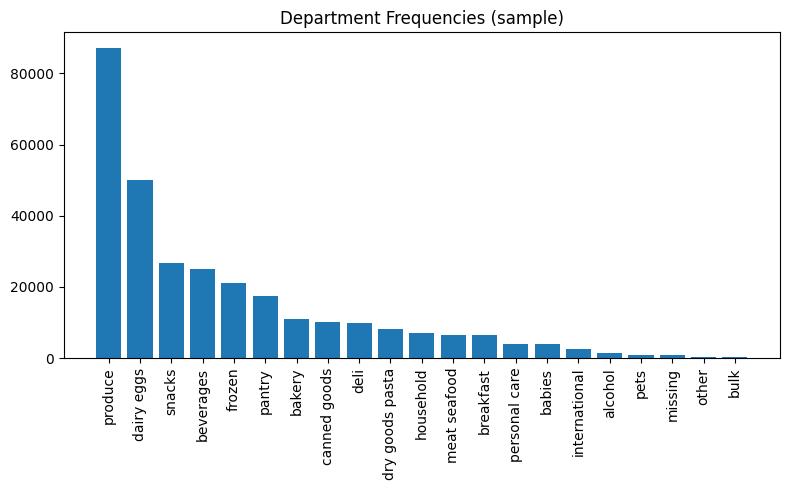

In [69]:
dept_counts = df_sample["department"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(dept_counts.index.astype(str), dept_counts.values)
plt.title("Department Frequencies (sample)")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

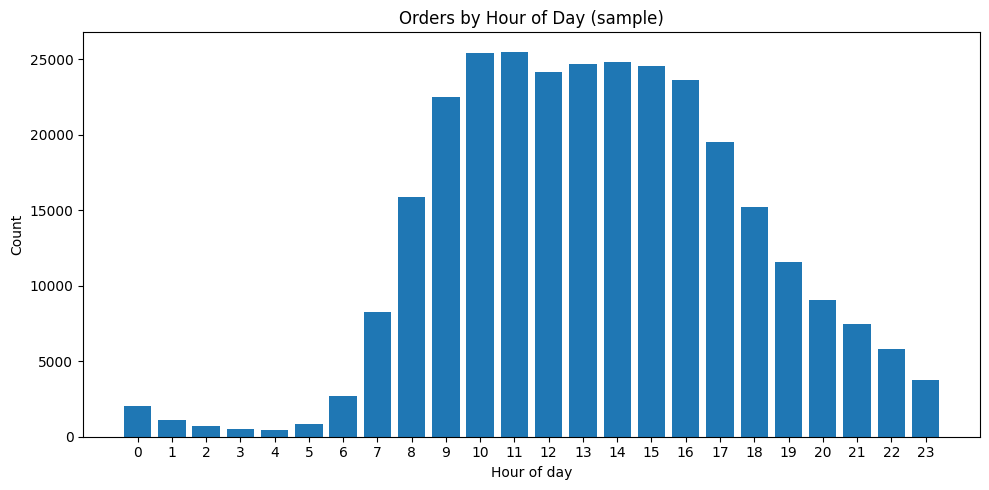

In [43]:
hour_counts = (
    df_sample["order_hour_of_day"]
    .value_counts()
    .sort_index()
)

plt.figure(figsize=(10, 5))
plt.bar(hour_counts.index.astype(str), hour_counts.values)
plt.title("Orders by Hour of Day (sample)")
plt.xlabel("Hour of day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

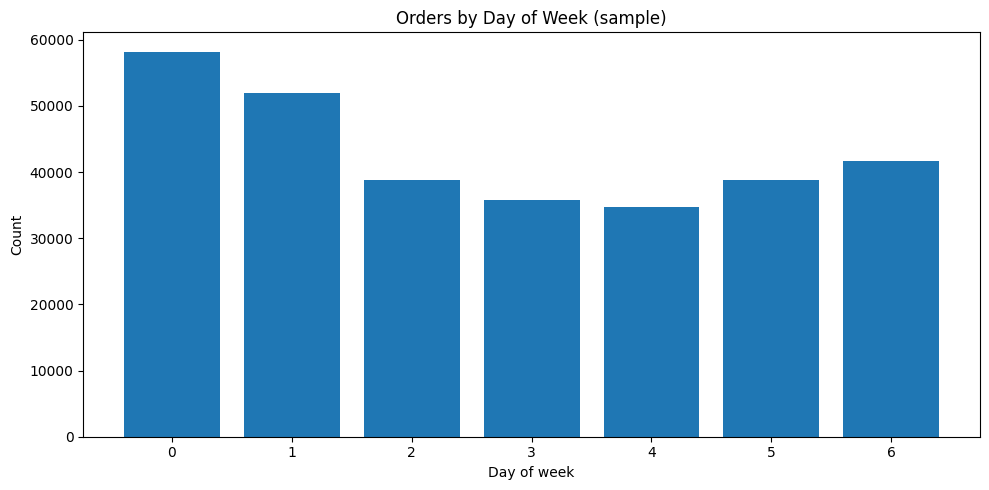

In [44]:
dow_counts = (
    df_sample["order_dow"]
    .value_counts()
    .sort_index()
)

plt.figure(figsize=(10, 5))
plt.bar(dow_counts.index.astype(str), dow_counts.values)
plt.title("Orders by Day of Week (sample)")
plt.xlabel("Day of week")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

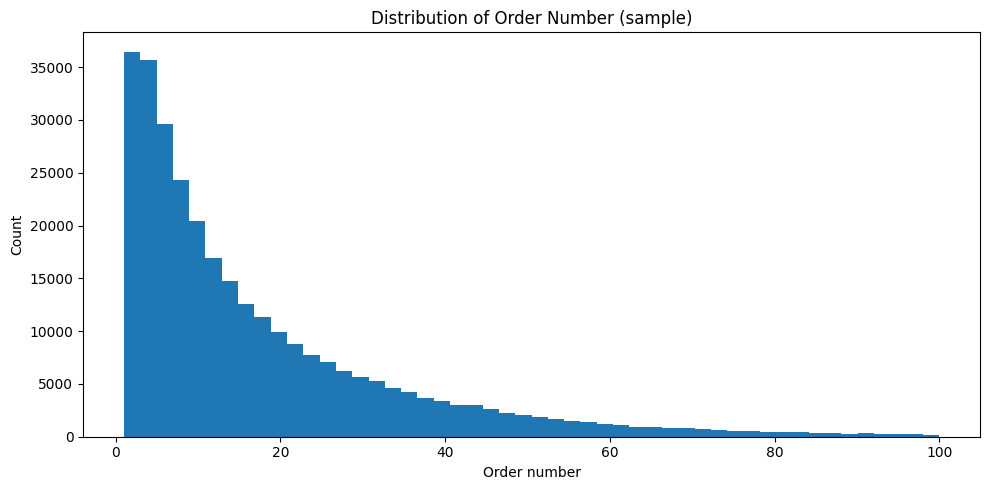

In [45]:
plt.figure(figsize=(10, 5))
plt.hist(df_sample["order_number"], bins=50)
plt.title("Distribution of Order Number (sample)")
plt.xlabel("Order number")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

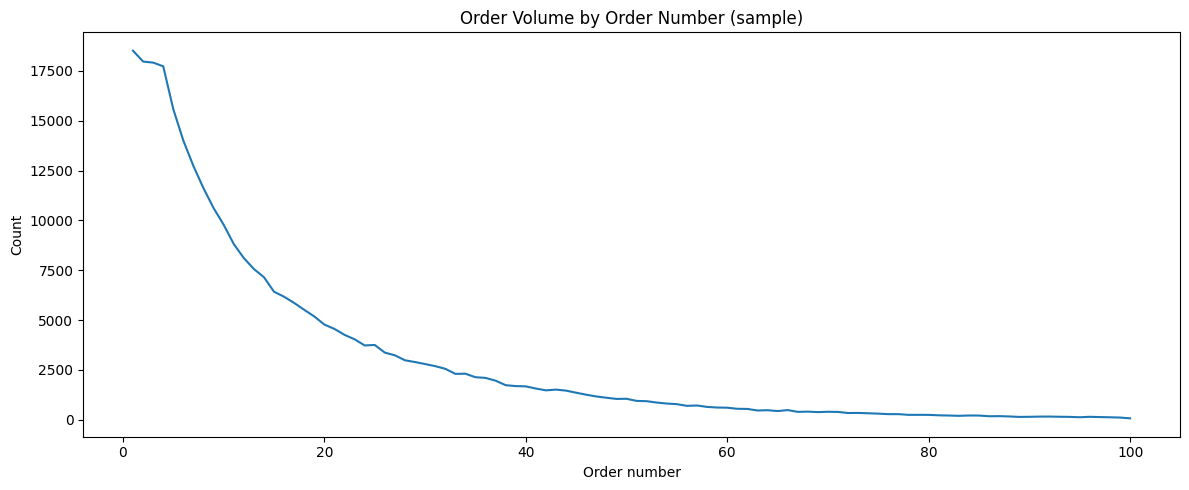

In [70]:
order_number_trend = (
    df_sample.groupby("order_number")["order_id"].count().sort_index()
)

plt.figure(figsize=(12, 5))
plt.plot(monthly_trend.index, monthly_trend.values)
plt.title("Order Volume by Order Number (sample)")
plt.xlabel("Order number")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [71]:
df_sample["days_since_prior_order"] = (
    df_sample["days_since_prior_order"].fillna(0)      # sentinel representing "no previous order"
    .astype(np.float32)
)

In [48]:
# median_days = df_sample["days_since_prior_order"].median()
# df_sample["days_since_prior_order"] = df_sample["days_since_prior_order"].fillna(median_days)

In [49]:
def winsorize_series(s, lower=0.01, upper=0.99):
    low, high = s.quantile([lower, upper])
    return s.clip(lower=low, upper=high)

df_sample["days_since_prior_order_wr"] = winsorize_series(df_sample["days_since_prior_order"])
df_sample["add_to_cart_order_wr"] = winsorize_series(df_sample["add_to_cart_order"])

In [50]:
ohe_cols = ["department"]
df_ohe = pd.get_dummies(df_sample[ohe_cols], prefix=ohe_cols, dtype=np.uint8)
df_encoded = pd.concat([df_sample, df_ohe], axis=1)

In [51]:
"""
The Problem: product_id (~50,000) and user_id (~200,000) cannot be one-hot encoded.

Solution: use Smoothed Target Encoding with K-fold leakage prevention.

We compute for each category:

  TE(x) = (sum_y_x + prior * α) / (count_x + α)

Where:
- prior = global mean of target
- α = smoothing parameter (e.g., 10–50)

And we compute TE inside each fold, so no row sees its own target.
"""

'\nThe Problem: product_id (~50,000) and user_id (~200,000) cannot be one-hot encoded.\n\nSolution: use Smoothed Target Encoding with K-fold leakage prevention.\n\nWe compute for each category:\n\n  TE(x) = (sum_y_x + prior * α) / (count_x + α)\n\nWhere:\n- prior = global mean of target\n- α = smoothing parameter (e.g., 10–50)\n\nAnd we compute TE inside each fold, so no row sees its own target.\n'

In [52]:
from sklearn.model_selection import KFold

def target_encode(train, col, target="reordered", n_splits=5, smoothing=20):
    df = train.copy()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    global_mean = df[target].mean()
    encoded = pd.Series(np.zeros(df.shape[0]), index=df.index)

    for train_idx, valid_idx in kf.split(df):
        tr, val = df.iloc[train_idx], df.iloc[valid_idx]

        stats = tr.groupby(col)[target].agg(["mean", "count"])
        stats["smoothed"] = (
            (stats["mean"] * stats["count"] + global_mean * smoothing) /
            (stats["count"] + smoothing)
        )

        encoded.iloc[valid_idx] = val[col].map(stats["smoothed"]).fillna(global_mean)

    return encoded

In [53]:
df_sample["product_id_te"] = target_encode(df_sample, "product_id")
df_sample["user_id_te"]    = target_encode(df_sample, "user_id")

In [54]:
def frequency_encode(df, col):
    freq = df[col].value_counts()
    return df[col].map(freq).astype(np.float32)

df_sample["product_id_fe"] = frequency_encode(df_sample, "product_id")
df_sample["aisle_fe"]      = frequency_encode(df_sample, "aisle")

In [55]:
# Use only prior rows to build historical features (avoid target leakage conceptually)
df_sample_prior = df_sample[df_sample["eval_set"] == "prior"].copy()

# Basket size per order (within the sample)
order_sizes = df_sample_prior.groupby("order_id").size().rename("basket_size")
df_sample_prior = df_sample_prior.merge(order_sizes, on="order_id", how="left")

In [56]:
user_features = df_sample_prior.groupby("user_id").agg(
    user_n_orders=("order_number", "nunique"),
    user_total_orders=("order_id", "nunique"),
    user_avg_basket_size=("basket_size", "mean"),
    user_total_items=("product_id", "count"),
    user_reorder_ratio=("reordered", "mean"),
    user_mean_days_between_orders=("days_since_prior_order", "mean"),
    user_last_order_number=("order_number", "max")
).reset_index()

# Recency relative to last order_number in the sample
global_last_order = df_sample_prior["order_number"].max()
user_features["user_last_order_recency"] = (
    global_last_order - user_features["user_last_order_number"]
)

In [57]:
product_features = df_sample_prior.groupby("product_id").agg(
    prod_n_orders=("order_id", "nunique"),
    prod_n_purchases=("product_id", "count"),
    prod_reorder_rate=("reordered", "mean"),
    prod_avg_cart_position=("add_to_cart_order", "mean")
).reset_index()

prod_time = df_sample_prior.groupby("product_id")["order_number"].agg(
    prod_first_order_num="min",
    prod_last_order_num="max",
    prod_mean_order_num="mean"
).reset_index()

product_features = product_features.merge(prod_time, on="product_id", how="left")

In [58]:
up_features = df_sample_prior.groupby(["user_id", "product_id"]).agg(
    up_n_purchases=("order_id", "count"),
    up_last_order_number=("order_number", "max"),
    up_first_order_number=("order_number", "min"),
    up_mean_add_to_cart=("add_to_cart_order", "mean"),
    up_reorder_rate=("reordered", "mean")
).reset_index()

# Approximate user timeline using cumulative sum of days_since_prior_order
user_time = df_sample_prior.sort_values(["user_id", "order_number"]).copy()
user_time["user_cum_days"] = user_time.groupby("user_id")["days_since_prior_order"].cumsum()

last_purchase_time = user_time.groupby(["user_id", "product_id"])["user_cum_days"].max().rename(
    "up_last_purchase_cum_days"
).reset_index()

up_features = up_features.merge(last_purchase_time, on=["user_id", "product_id"], how="left")

In [59]:
# weekend flag (adjust dow mapping if needed)
df_sample["is_weekend"] = df_sample["order_dow"].isin([0, 1]).astype(np.int8)

# part of day (categorical; you can OHE if you want)
df_sample["part_of_day"] = pd.cut(
    df_sample["order_hour_of_day"],
    bins=[-1, 5, 11, 17, 21, 24],
    labels=["night", "morning", "afternoon", "evening", "late_evening"]
)

# cyclic encoding for hour (non-linear time-of-day)
df_sample["order_hour_sin"] = np.sin(2 * np.pi * df_sample["order_hour_of_day"] / 24)
df_sample["order_hour_cos"] = np.cos(2 * np.pi * df_sample["order_hour_of_day"] / 24)

In [60]:
df_sample = df_sample.merge(user_features, on="user_id", how="left")
df_sample = df_sample.merge(product_features, on="product_id", how="left")
df_sample = df_sample.merge(up_features, on=["user_id", "product_id"], how="left")

In [61]:
df_sample.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,...,prod_avg_cart_position,prod_first_order_num,prod_last_order_num,prod_mean_order_num,up_n_purchases,up_last_order_number,up_first_order_number,up_mean_add_to_cart,up_reorder_rate,up_last_purchase_cum_days
0,740068,21616,16,0,Organic Baby Arugula,123,4,packaged vegetables fruits,produce,172941,...,8.473054,1.0,99.0,16.598802,1.0,25.0,25.0,16.0,0.0,17.0
1,1360271,35503,5,1,Organic Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs,5215,...,7.166667,1.0,90.0,21.025641,1.0,3.0,3.0,5.0,1.0,50.0
2,3211401,5819,13,1,Baby Carrots,123,4,packaged vegetables fruits,produce,113114,...,9.315789,3.0,37.0,13.052632,1.0,33.0,33.0,13.0,1.0,24.0
3,2931112,9387,3,0,Granny Smith Apples,24,4,fresh fruits,produce,138407,...,7.367925,1.0,97.0,17.676101,1.0,1.0,1.0,3.0,0.0,0.0
4,1149035,8277,3,1,Apple Honeycrisp Organic,24,4,fresh fruits,produce,78836,...,7.301136,1.0,98.0,22.781250,1.0,9.0,9.0,3.0,1.0,3.0


In [62]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   order_id                       300000 non-null  int32   
 1   product_id                     300000 non-null  int32   
 2   add_to_cart_order              300000 non-null  int16   
 3   reordered                      300000 non-null  int8    
 4   product_name                   300000 non-null  category
 5   aisle_id                       300000 non-null  int16   
 6   department_id                  300000 non-null  int16   
 7   aisle                          300000 non-null  category
 8   department                     300000 non-null  category
 9   user_id                        300000 non-null  int32   
 10  eval_set                       300000 non-null  category
 11  order_number                   300000 non-null  int16   
 12  order_dow       

In [63]:
# columns to fill from user_features
user_cols = [
    "user_n_orders",
    "user_total_orders",
    "user_avg_basket_size",
    "user_total_items",
    "user_reorder_ratio",
    "user_mean_days_between_orders",
    "user_last_order_number",
    "user_last_order_recency"
]

# global means over users (computed on df_sample_prior)
user_means = user_features[user_cols].mean(numeric_only=True)

for col in user_cols:
    df_sample[col] = df_sample[col].fillna(user_means[col])

In [64]:
prod_cols = [
    "prod_n_orders",
    "prod_n_purchases",
    "prod_reorder_rate",
    "prod_avg_cart_position",
    "prod_first_order_num",
    "prod_last_order_num",
    "prod_mean_order_num"
]

prod_means = product_features[prod_cols].mean(numeric_only=True)

for col in prod_cols:
    df_sample[col] = df_sample[col].fillna(prod_means[col])

In [65]:
up_cols = [
    "up_n_purchases",
    "up_last_order_number",
    "up_first_order_number",
    "up_mean_add_to_cart",
    "up_reorder_rate",
    "up_last_purchase_cum_days"
]

up_means = up_features[up_cols].mean(numeric_only=True)

for col in up_cols:
    df_sample[col] = df_sample[col].fillna(up_means[col])

In [66]:
# interaction: user reorder tendency × product reorder tendency
df_sample["user_prod_reorder_interaction"] = (
    df_sample["user_reorder_ratio"] * df_sample["prod_reorder_rate"]
)

# log-transform skewed product purchase count
df_sample["log_prod_n_purchases"] = np.log1p(df_sample["prod_n_purchases"])